# Telecom Churn - ML Group Case Study

## Problem Statement:
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


## Contents
1. Data Understanding 
2. Data Cleaning
3. Tagging Churn Labels
4. EDA
    - Univariate Analysis
    - Bivariate Analysis
    - Deriving New Features
5. Modelling
    - PCA
    - Logistic Regression
    - XGBoost
    - Decision Tree
    - Random Forest
6. Model Selection
7. Feature Importance
8. Recommendations

In [1]:
## importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn import model_selection

from sklearn.tree import DecisionTreeClassifier
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

### 1. Data Understanding

In [2]:
df_raw = pd.read_csv('telecom_churn_data.csv')

In [3]:
df_raw.shape

(99999, 226)

In [4]:
#pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

#### 1.1 Info & Describe

In [5]:
df_raw.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
df_raw.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

#### 1.2 Filtering high value customers

In [7]:
total_rech_cols = [col for col in df_raw.columns if 'total_rech_' in col]
print(total_rech_cols)

avg_cols = [col for col in df_raw.columns if 'av_' in col]
print(avg_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']
['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


In [8]:
df_raw['total_rech_data_amt_6'] = df_raw['total_rech_data_6'] * df_raw['av_rech_amt_data_6']
df_raw['total_rech_data_amt_7'] = df_raw['total_rech_data_7'] * df_raw['av_rech_amt_data_7']
df_raw['total_rech_data_amt_8'] = df_raw['total_rech_data_8'] * df_raw['av_rech_amt_data_8']
df_raw['total_rech_data_amt_9'] = df_raw['total_rech_data_9'] * df_raw['av_rech_amt_data_9']

In [9]:
#Dropping total_rech_data_X and av_rech_amt_data_X
# df_raw.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'
#          ,'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
#        , axis=1, inplace=True)
# df_raw.shape

In [10]:
avg_amt = (df_raw['total_rech_amt_6'].fillna(0) + df_raw['total_rech_data_amt_6'].fillna(0) 
           +df_raw['total_rech_amt_7'].fillna(0) + df_raw['total_rech_data_amt_7'].fillna(0))/2
avg_amt.describe(percentiles=[.25,.50,.70,.75])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
75%        553.000000
max      61236.000000
dtype: float64

In [11]:
##creating col named average recharge to segreegate the hihg value customers
df_raw['avg_rech_amt_6and7'] = (df_raw.total_rech_amt_6 + df_raw.total_rech_amt_7)/2.0
#df_raw = df_raw.drop(['total_rech_amt_6','total_rech_amt_7'],axis=1)

<AxesSubplot:>

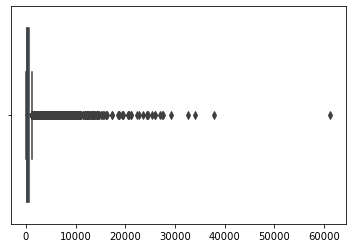

In [12]:
sns.boxplot(avg_amt)

In [13]:
df_raw.avg_rech_amt_6and7 = avg_amt
df_raw.avg_rech_amt_6and7.describe(percentiles=[.25,.50,.70,.75])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
75%        553.000000
max      61236.000000
Name: avg_rech_amt_6and7, dtype: float64

In [14]:
#### 70th percentile is 478. High value customers will be filtered based on the 444 amount.
df_raw = df_raw[df_raw.avg_rech_amt_6and7 > 478.00]

In [15]:
df_raw.shape

(29953, 231)

## 2. Data Cleaning

In [16]:
null = pd.DataFrame(df_raw.isnull().sum()*100/len(df_raw))
null.columns = ['values']

In [17]:
null.sort_values(by='values',ascending=False)

,values
count_rech_2g_9,49.253831
arpu_2g_9,49.253831
night_pck_user_9,49.253831
total_rech_data_9,49.253831
date_of_last_rech_data_9,49.253831
...,...
max_rech_amt_7,0.000000
max_rech_amt_6,0.000000
total_rech_amt_9,0.000000
total_rech_amt_8,0.000000


In [18]:
null[null.values > 70].index

Index([], dtype='object')

In [19]:
df_raw = df_raw.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'], axis=1)

In [20]:
df_raw.shape

(29953, 191)

In [21]:
null = pd.DataFrame(df_raw.isnull().sum()*100/len(df_raw))
null.columns = ['values']
null.sort_values(by='values',ascending=False)

,values
total_rech_data_amt_9,49.253831
total_rech_data_amt_8,46.799987
total_rech_data_amt_6,44.112443
total_rech_data_amt_7,43.117551
std_ic_t2t_mou_9,6.336594
...,...
max_rech_amt_9,0.000000
last_day_rch_amt_6,0.000000
last_day_rch_amt_7,0.000000
last_day_rch_amt_8,0.000000


In [22]:
cols_all = df_raw.columns
cols_float64 = df_raw.select_dtypes('float64').columns
cols_int64 = df_raw.select_dtypes('int64').columns
cols_remaining = list(set(cols_all) - (set(cols_float64) | set(cols_int64)))
len(cols_float64)+len(cols_int64)+len(cols_remaining)

191

In [23]:
cols_remaining

['date_of_last_rech_6',
 'last_date_of_month_6',
 'date_of_last_rech_7',
 'last_date_of_month_8',
 'date_of_last_rech_8',
 'last_date_of_month_9',
 'last_date_of_month_7',
 'date_of_last_rech_9']

In [24]:
# ?pd.to_datetime

In [25]:
df_raw[cols_remaining] = df_raw[cols_remaining].apply(pd.to_datetime)

In [26]:
df_raw[cols_remaining].describe()

,date_of_last_rech_6,last_date_of_month_6,date_of_last_rech_7,last_date_of_month_8,date_of_last_rech_8,last_date_of_month_9,last_date_of_month_7,date_of_last_rech_9
count,29880,29953,29855,29788,29371,29588,29926,29139
unique,30,1,31,1,31,1,1,30
top,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00,2014-07-31 00:00:00,2014-09-29 00:00:00
freq,8365,29953,7605,29788,6191,29588,29926,9380
first,2014-06-01 00:00:00,2014-06-30 00:00:00,2014-07-01 00:00:00,2014-08-31 00:00:00,2014-08-01 00:00:00,2014-09-30 00:00:00,2014-07-31 00:00:00,2014-09-01 00:00:00
last,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00,2014-07-31 00:00:00,2014-09-30 00:00:00


In [27]:
#As you can see few cols have only one unique value, lets drop them
to_be_dropped = ['last_date_of_month_8','last_date_of_month_9','last_date_of_month_7','last_date_of_month_6']
df_raw = df_raw.drop(to_be_dropped,axis=1)

In [28]:
df_raw = df_raw.drop('mobile_number',axis=1)

#### Deriving New Features

In [29]:
df_raw.date_of_last_rech_6.max()-df_raw.date_of_last_rech_6

0        9 days
7        3 days
8        5 days
21       0 days
23      12 days
          ...  
99981   13 days
99984    9 days
99986   10 days
99988    0 days
99997   13 days
Name: date_of_last_rech_6, Length: 29953, dtype: timedelta64[ns]

In [30]:
## converting date time columns to duration
## need to check the last date of recharge significance, not evident, as not clear which date should be ref, 7th max or 6th max

df_raw['daysfrom_last_rech_6'] = (df_raw.date_of_last_rech_6.max() - df_raw.date_of_last_rech_6)/ np.timedelta64(1,'D')
df_raw['daysfrom_last_rech_7'] = (df_raw.date_of_last_rech_7.max() - df_raw.date_of_last_rech_7)/ np.timedelta64(1,'D')
df_raw['daysfrom_last_rech_8'] = (df_raw.date_of_last_rech_8.max() - df_raw.date_of_last_rech_8)/ np.timedelta64(1,'D')
df_raw['daysfrom_last_rech_9'] = (df_raw.date_of_last_rech_9.max() - df_raw.date_of_last_rech_9)/ np.timedelta64(1,'D')

##dropping the orginal columns
df_raw = df_raw.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'], axis=1)

df_raw.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,avg_rech_amt_6and7,daysfrom_last_rech_6,daysfrom_last_rech_7,daysfrom_last_rech_8,daysfrom_last_rech_9
0,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN,559.0,9.0,15.0,23.0,2.0
7,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.5,0.0,6.50,NaN,0.0,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,22

In [31]:
# df_raw = df_raw.dropna(axis=0)

#Replace NAs with mode/most frequent
for column in df_raw.columns:
    df_raw[column].fillna(df_raw[column].mode()[0], inplace=True)

In [32]:
any(df_raw.isnull().any().values)

False

In [33]:
df_raw.shape

(29953, 186)

In [34]:
df_raw.isnull().sum()

circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
arpu_6                  0
                       ..
avg_rech_amt_6and7      0
daysfrom_last_rech_6    0
daysfrom_last_rech_7    0
daysfrom_last_rech_8    0
daysfrom_last_rech_9    0
Length: 186, dtype: int64

In [35]:
row_drop = 100- (df_raw.shape[0]*100/99999)
col_drop = 100- (df_raw.shape[1]*100/226)

print(row_drop, col_drop)

70.04670046700467 17.69911504424779


## 3. Tagging Churn Customers

In [36]:
## Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the 
##churn phase. total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9
df_raw['churn'] = np.where(df_raw[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)==0,1,0)

In [37]:
df_raw['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [38]:
df_raw[df_raw.churn ==1][['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,1
67,0.0,0.0,0.0,0.0,1
86,0.0,0.0,0.0,0.0,1
111,0.0,0.0,0.0,0.0,1


In [39]:
## Removing last month related columns.
month_9_features = list(filter(lambda x:'_9' in x, df_raw.columns))
df_raw[df_raw.churn !=1][month_9_features+['churn']].head()

,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,last_day_rch_amt_9,vol_2g_mb_9,vol_3g_mb_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,total_rech_data_amt_9,daysfrom_last_rech_9,churn
8,166.787,33.46,108.71,0.0,0.0,26.13,34.58,0.00,0.00,60.71,7.33,74.13,0.00,0.0,81.46,0.0,0.00,0.0,142.18,4.03,17.34,0.00,21.38,0.00,13.53,0.00,0.0,13.53,34.91,0.00,0.00,0.00,15,186,36,0,0.00,0.00,0,0,0,0,252.0,0.0,0
21,578.596,161.63,869.89,0.0,0.0,29.98,107.54,0.00,0.00,137.53,131.64,762.34,0.00,0.0,893.99,0.0,0.00,0.0,1031.53,17.99,113.46,8.41,139.88,16.74,95.98,0.00,0.0,112.73,252.61,0.00,0.00,0.00,17,680,50,30,0.00,0.00,0,0,0,0,252.0,0.0,0
23,811.480,15.74,111.88,0.0,0.0,15.74,83.73,2.45,4.08,101.93,0.00,11.44,3.89,0.0,15.34,0.0,10.35,0.0,127.63,45.36,75.83,0.00,121.19,1.08,5.20,0.00,0.0,6.28,127.48,0.00,0.00,0.00,4,252,252,0,13.93,314.74,0,0,1,0,252.0,2.0,0
33,799.356,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.7,0.00,0.0,1.70,0.41,8.01,9.81,18.24,8.53,15.79,9.81,0.0,34.14,114.16,0.08,61.41,0.26,6,1007,655,0,30.92,5588.11,0,0,2,0,1814.0,2.0,0
38,391.709,494.79,213.24,0.0,0.0,16.39,49.96,0.00,0.00,66.36,478.39,163.16,0.00,0.0,641.56,0.0,0.11,0.0,708.04,18.56,31.74,0.00,50.31,12.03,51.74,0.00,0.0,63.78,114.09,0.00,0.00,0.00,15,487,130,0,0.00,0.00,0,3,0,0,207.0,4.0,0


In [40]:
df_raw = df_raw.drop(month_9_features, axis=1)

In [41]:
df_raw.shape

(29953, 143)

## 4. EDA 

In [42]:
df_raw.shape

(29953, 143)

In [43]:
df_raw.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_rech_amt_6and7,daysfrom_last_rech_6,daysfrom_last_rech_7,daysfrom_last_rech_8,churn
count,29953.0,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,109.0,0.0,0.0,0.0,558.820058,561.160547,508.890301,260.900880,268.051744,234.

In numeric columns following columns have unique values-
circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8,std_ic_t2o_mou_9, 

In [44]:
## finding columns with only one unique values

singleunique_col = df_raw.loc[:, df_raw.apply(pd.Series.nunique)==1]
singleunique_col.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df_raw = df_raw.drop(singleunique_col.columns, axis=1)

In [46]:
df_raw.shape

(29953, 133)

In [47]:
df1 = df_raw.copy()

In [48]:
## converting Age on network in years
df1.aon = df1.aon/365

In [49]:
#sns.pairplot(data=df1)

Text(0, 0.5, 'Churn')

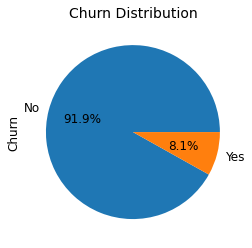

In [50]:
## looking for churn distribution

ax = round(df1.churn.value_counts(normalize = True)*100,2).plot.pie(autopct = '%.1f%%', labels=['No','Yes'], fontsize=12)
ax.set_title('Churn Distribution', fontsize=14)
ax.set_ylabel('Churn', fontsize=12)

In [51]:
df1.churn.value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [52]:
round(df1.churn.value_counts(normalize = True)*100,2)

0    91.88
1     8.12
Name: churn, dtype: float64

Summary - Prediction Variable
- Data is skewed, 91.88% data is no churn, 8.12% data is churn.
- 91.88% data is no churn indicating provided service is good.
- To draw any inference or insights we need to treat the class imbalace.

In [53]:
df1.aon.describe([0.1,0.25,0.5,0.75,0.9,0.98])

count    29953.000000
mean         3.313097
std          2.623149
min          0.493151
10%          0.778082
25%          1.260274
50%          2.317808
75%          4.810959
90%          7.652055
98%          9.783452
max         11.838356
Name: aon, dtype: float64

Text(0.5, 1.0, 'Age on Network (days) Boxplot')

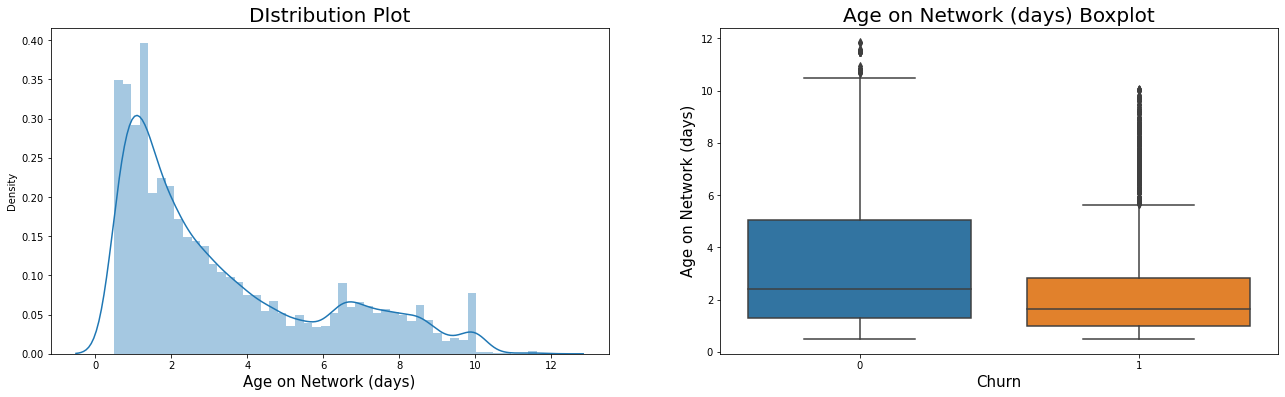

In [54]:
## Age on network distribution plot

plt.figure(figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.distplot(df1.aon)
ax.set_xlabel('Age on Network (days)', fontsize=15)
ax.set_title('DIstribution Plot',fontsize=20)

plt.subplot(1,2,2)
ay=sns.boxplot(x='churn',y='aon',data=df1)
ay.set_xlabel('Churn',fontsize=15)
ay.set_ylabel('Age on Network (days)',fontsize=15)
ay.set_title('Age on Network (days) Boxplot',fontsize=20)

In [55]:
## Cut to form labels around contineous data

df1['aon_cat'] = pd.cut(df1.aon,6,labels=['<2yr','2-4yr','4-6yr','6-8yr','8-10yr','10-12yr'])

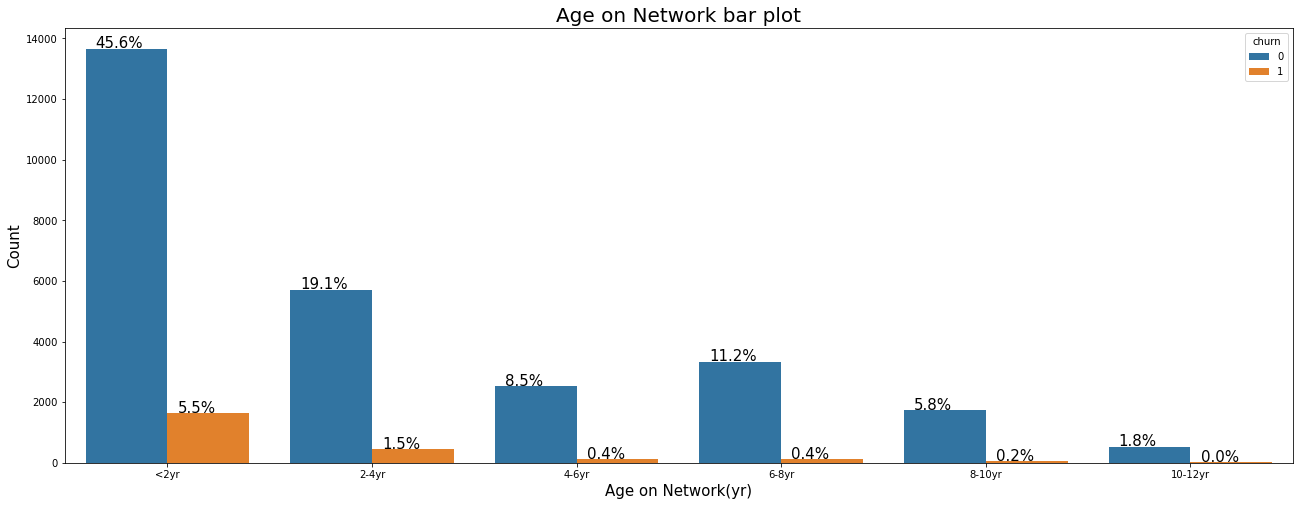

In [56]:
## bar chart of the age on the network with churn or not churn

plt.figure(figsize=(22,8))

ax = sns.countplot(x='aon_cat',data=df1,hue='churn')
ax.set_xlabel('Age on Network(yr)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age on Network bar plot', fontsize=20)
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df1))), (p.get_x()+0.05, 
                                                                                      p.get_height()+20),fontsize=15)

Summary - Age on Network
- As number of years on the network increases the precentage of churn decreases.
- Custemers with less than 2 years on network has highest percentages of churn, 5.5%

In [57]:
df1.jun_vbc_3g.describe([0.1,0.25,0.5,0.75,0.9,0.98])

count    29953.000000
mean       158.731865
std        416.989501
min          0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%         98.750000
90%        533.042000
98%       1447.812400
max      11166.210000
Name: jun_vbc_3g, dtype: float64

<AxesSubplot:xlabel='jun_vbc_3g'>

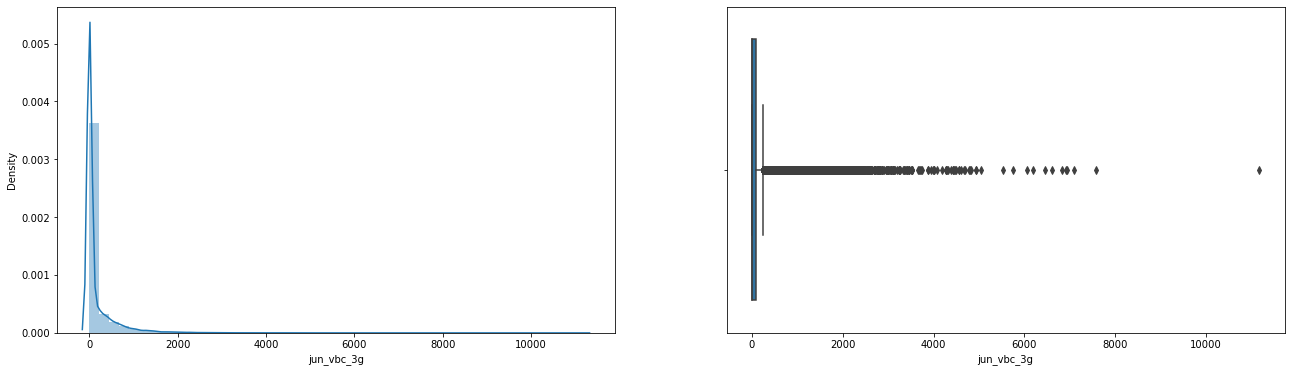

In [58]:
plt.figure(figsize=(22,6))

plt.subplot(1,2,1)
sns.distplot(df1.jun_vbc_3g)

plt.subplot(1,2,2)
sns.boxplot(x='jun_vbc_3g',data=df1)

Summary - jun_vbc_3g
- Upto 75 percentile value is zero, can be dropped the variable.

In [59]:
df1.jul_vbc_3g.describe([0.1,0.25,0.5,0.75,0.9,0.98])

count    29953.000000
mean       179.057629
std        443.756247
min          0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%        137.860000
90%        611.800000
98%       1562.720000
max       9165.600000
Name: jul_vbc_3g, dtype: float64

<AxesSubplot:xlabel='jul_vbc_3g'>

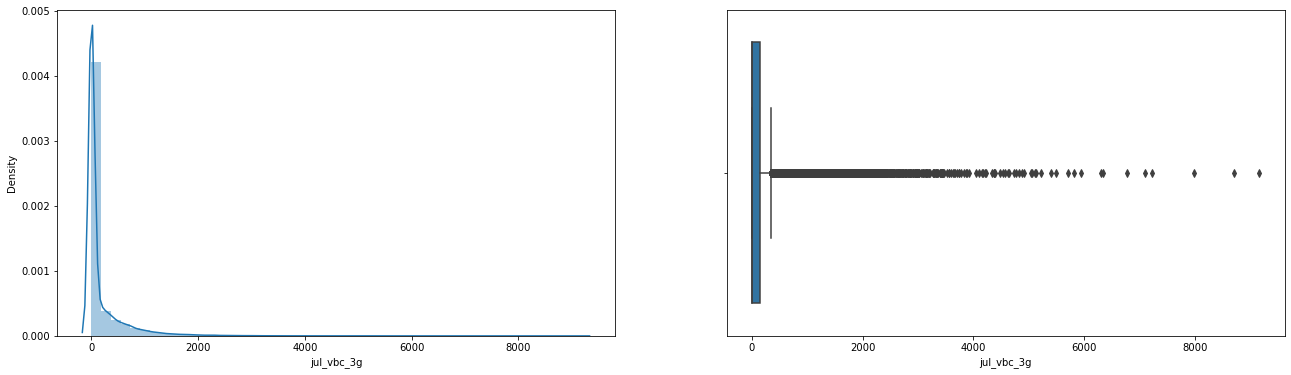

In [60]:
plt.figure(figsize=(22,6))

plt.subplot(1,2,1)
sns.distplot(df1.jul_vbc_3g)

plt.subplot(1,2,2)
sns.boxplot(x='jul_vbc_3g',data=df1)

Summary - jul_vbc_3g
- Upto 75 percentile value is zero, can be dropped the variable.

In [61]:
df1.avg_rech_amt_6and7.describe([0.1,0.25,0.5,0.9,.99])

count    29953.000000
mean      1153.701715
std       1359.533621
min        478.500000
10%        521.000000
25%        604.000000
50%        800.500000
90%       1992.000000
99%       6097.940000
max      61236.000000
Name: avg_rech_amt_6and7, dtype: float64

<AxesSubplot:xlabel='avg_rech_amt_6and7'>

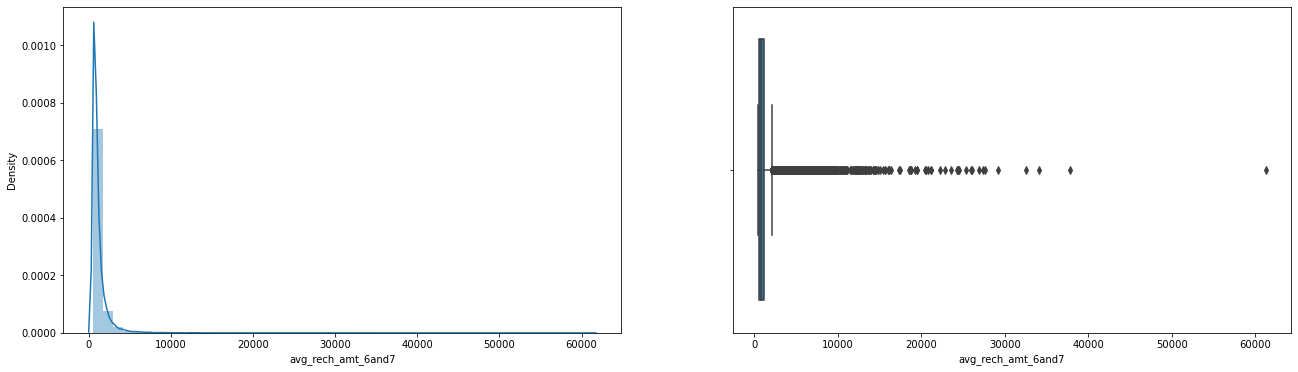

In [62]:
plt.figure(figsize=(22,6))

plt.subplot(1,2,1)
sns.distplot(df1.avg_rech_amt_6and7)

plt.subplot(1,2,2)
sns.boxplot(x='avg_rech_amt_6and7',data=df1)

In [63]:
def distboxplot(dataset,varname):
    
    #sns.kdeplot(ser_test, cumulative=True, bw=1.5)
    
    plt.figure(figsize=(22,12))

    plt.subplot(2,2,1)
    ax = sns.distplot(dataset[varname])
    ax.set_xlabel(varname,fontsize=15)
    ax.set_ylabel('Magnitude',fontsize=15)
    ax.set_title(varname + ' Distribution',fontsize=20)

    plt.subplot(2,2,2)
    ay = sns.boxplot(x=varname,data=dataset)
    ay.set_xlabel('Churn',fontsize=15)
    ay.set_ylabel(varname,fontsize=15)
    ay.set_title(varname + ' Boxplot',fontsize=20)
    
    plt.subplot(2,2,3)
    ay=sns.boxplot(x='churn',y=varname,data=dataset)
    ay.set_xlabel('Churn',fontsize=15)
    ay.set_ylabel(varname,fontsize=15)
    ay.set_title(varname + ' Boxplot',fontsize=20)
    

def singleboxplot(dataset,varname):
    ay=sns.boxplot(x='churn',y=varname,data=dataset)
    ay.set_xlabel('Churn',fontsize=15)
    ay.set_ylabel(varname,fontsize=15)
    ay.set_title(varname + ' Boxplot',fontsize=20)
    

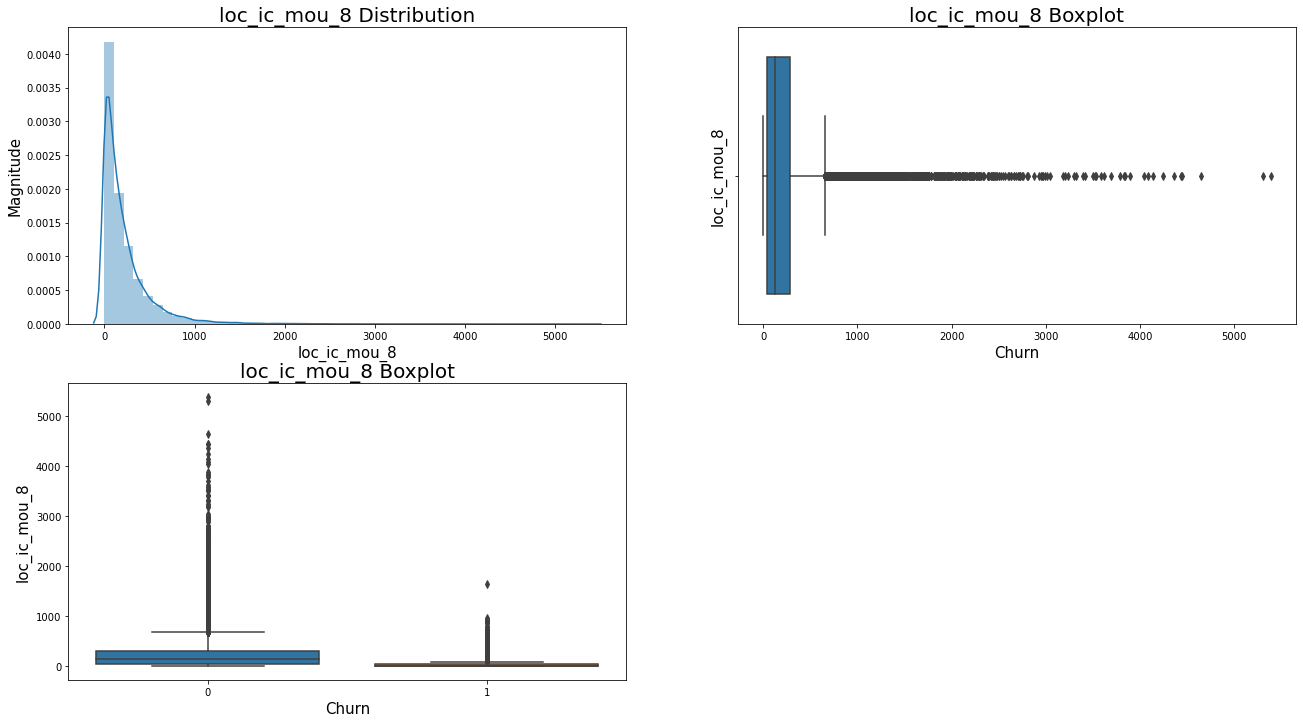

In [64]:
## loc_ic_mou_8
distboxplot(df1,'loc_ic_mou_8')

Summary-
- 'loc_ic_mou_8' clear trend can be observed between churn and non-churn customers.

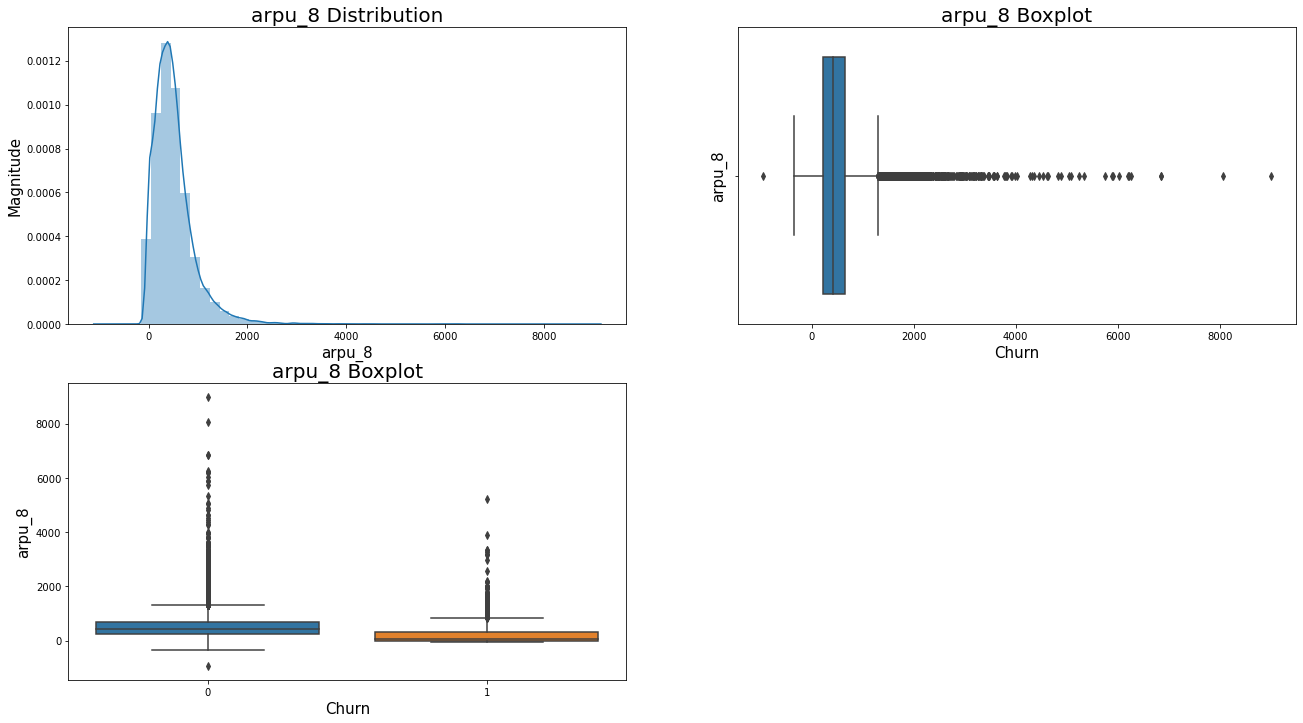

In [65]:
## arpu_8
## For now dummy dataset is considered. outlier treatment is necessary on this column
distboxplot(df1[df1.arpu_8<10000],'arpu_8')

Summary - 
- Clear trend is visible for churned and non churned customers.
- Outlier treatment is necessary for the variable, will be done in following cells.

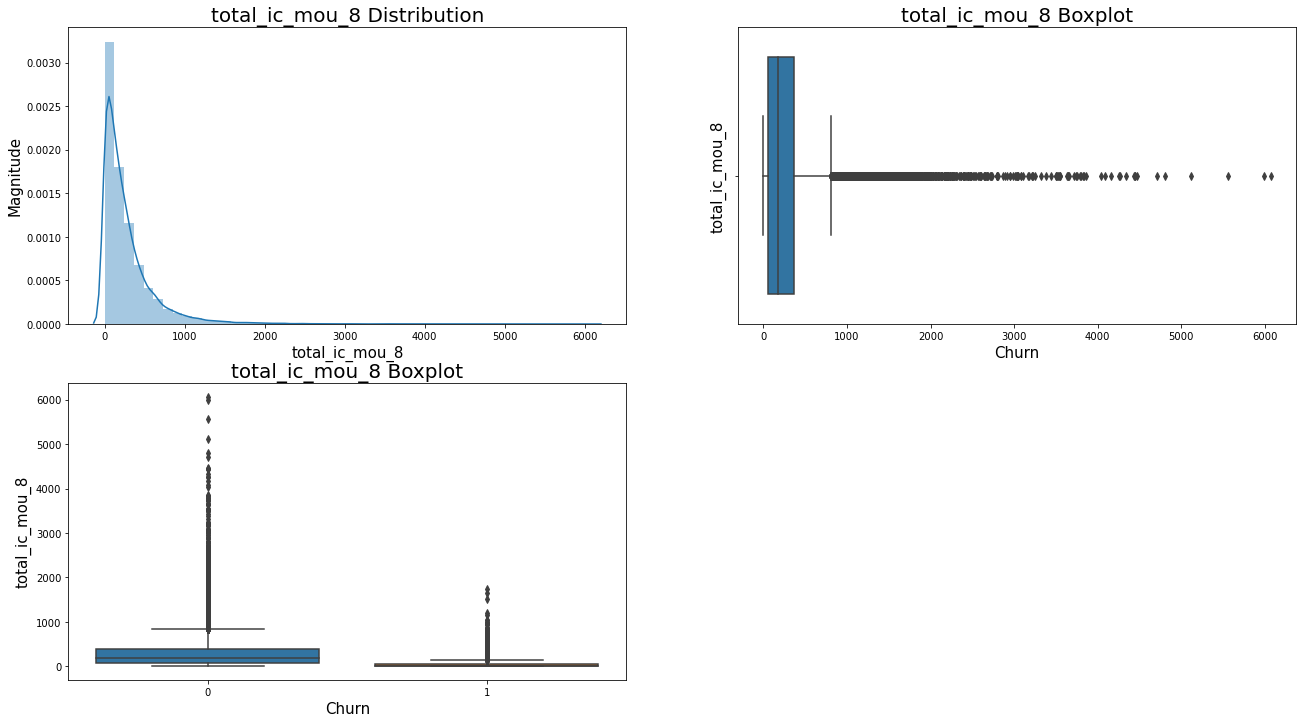

In [66]:
##total_ic_mou_8
distboxplot(df1,'total_ic_mou_8')

Summary - 
- Clear trend is visible for churned and non churned customers.
- Outlier treatment is necessary for the variable, will be done in following cells.

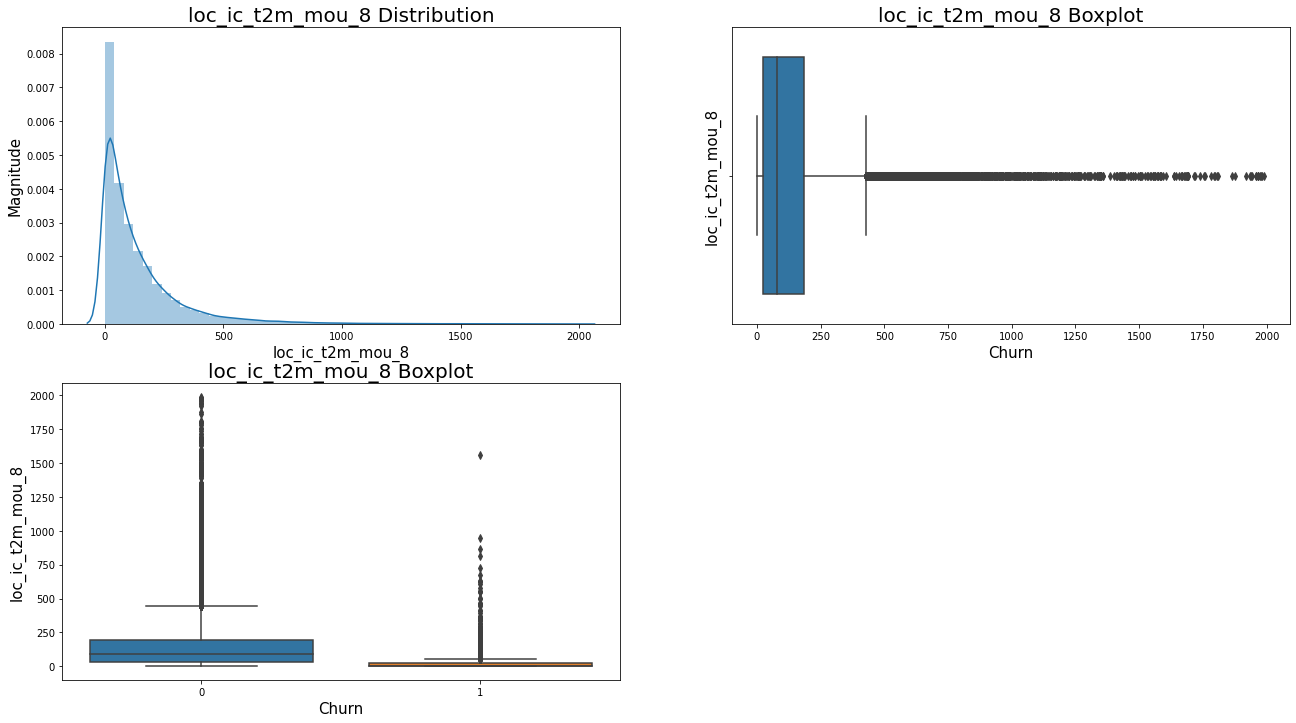

In [67]:
## loc_ic_t2m_mou_8
## For now dummy dataset is considered. outlier treatment is necessary on this column
distboxplot(df1[df1.loc_ic_t2m_mou_8<2000],'loc_ic_t2m_mou_8')

Summary - 
- Clear trend is visible for churned and non churned customers.
- Outlier treatment is necessary for the variable, will be done in following cells.

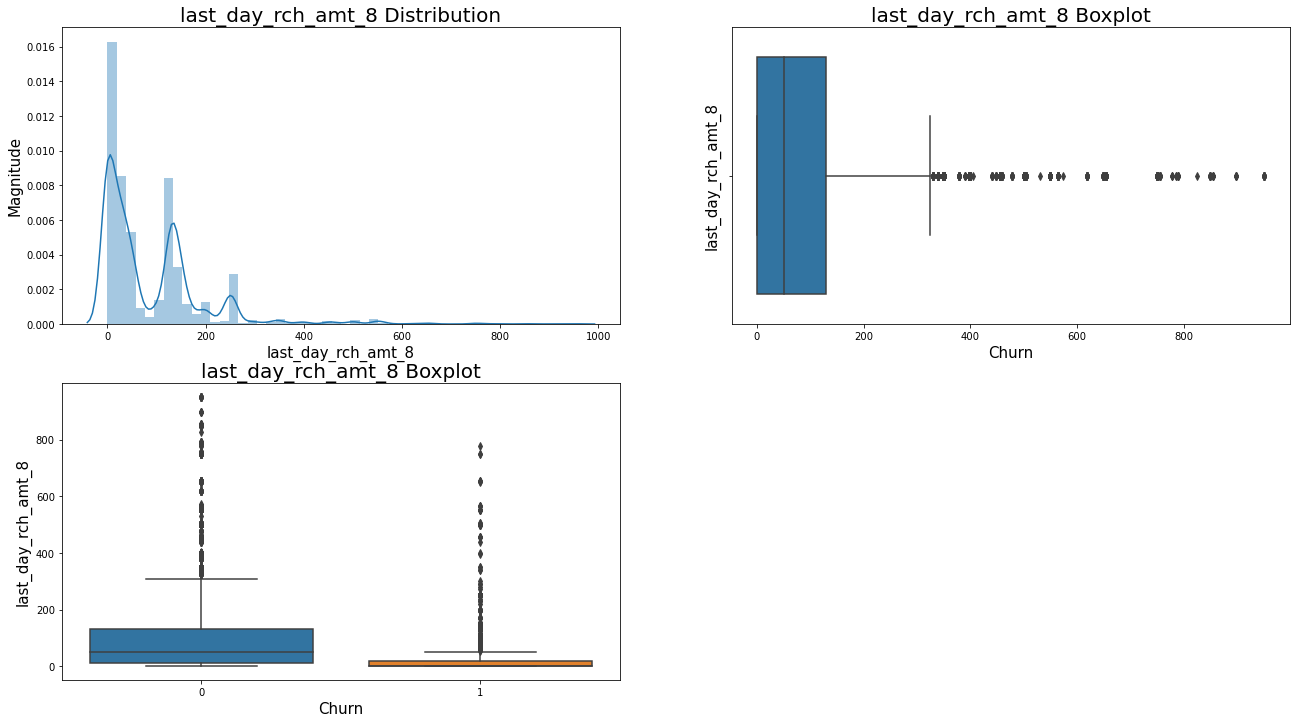

In [68]:
##last_day_rch_amt_8
## For now dummy dataset is considered. outlier treatment is necessary on this column
distboxplot(df1[df1.last_day_rch_amt_8<1000],'last_day_rch_amt_8')

Summary - 
- Clear trend is visible for churned and non churned customers. 
- Amount for churned customers decreases.
- Outlier treatment is necessary for the variable, will be done in following cells.

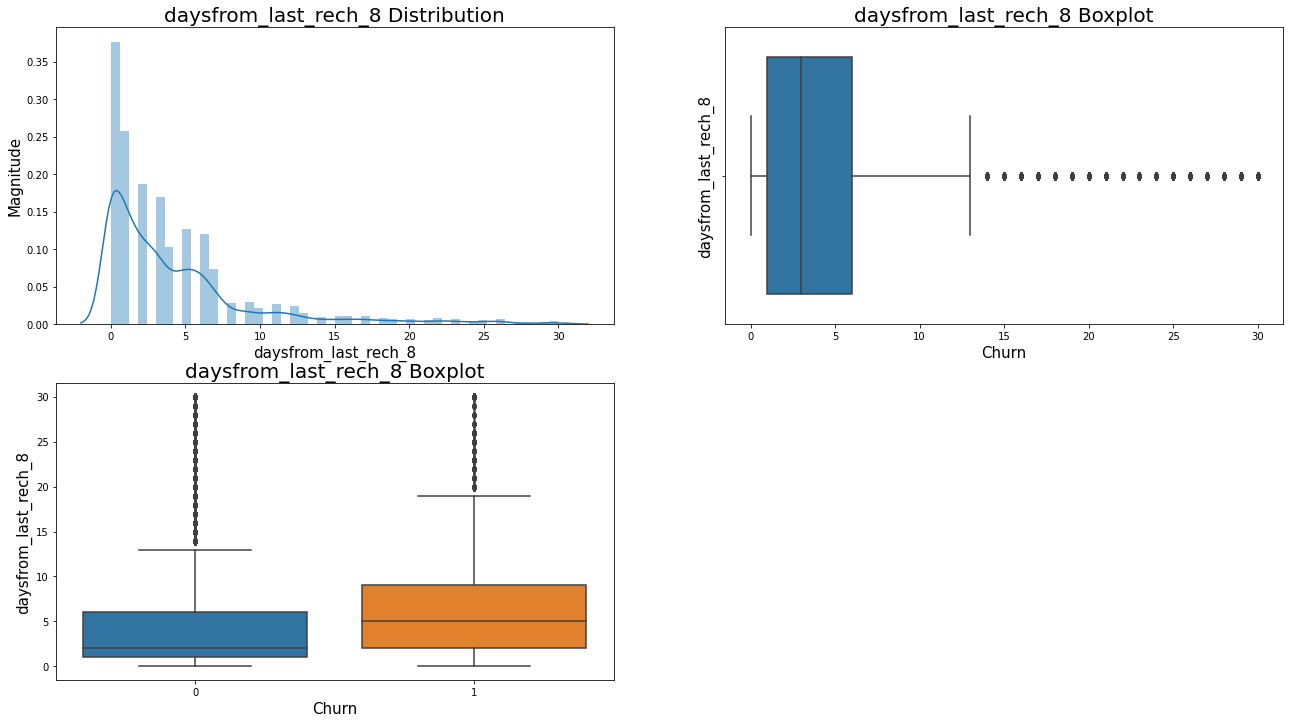

In [69]:
##daysfrom_last_rech_8
distboxplot(df1,'daysfrom_last_rech_8')

Summary - 
- Clear trend is visible for churned and non churned customers. 
- Duraction from last recharge is more for churned customers
- Outlier treatment is necessary for the variable, will be done in following cells.

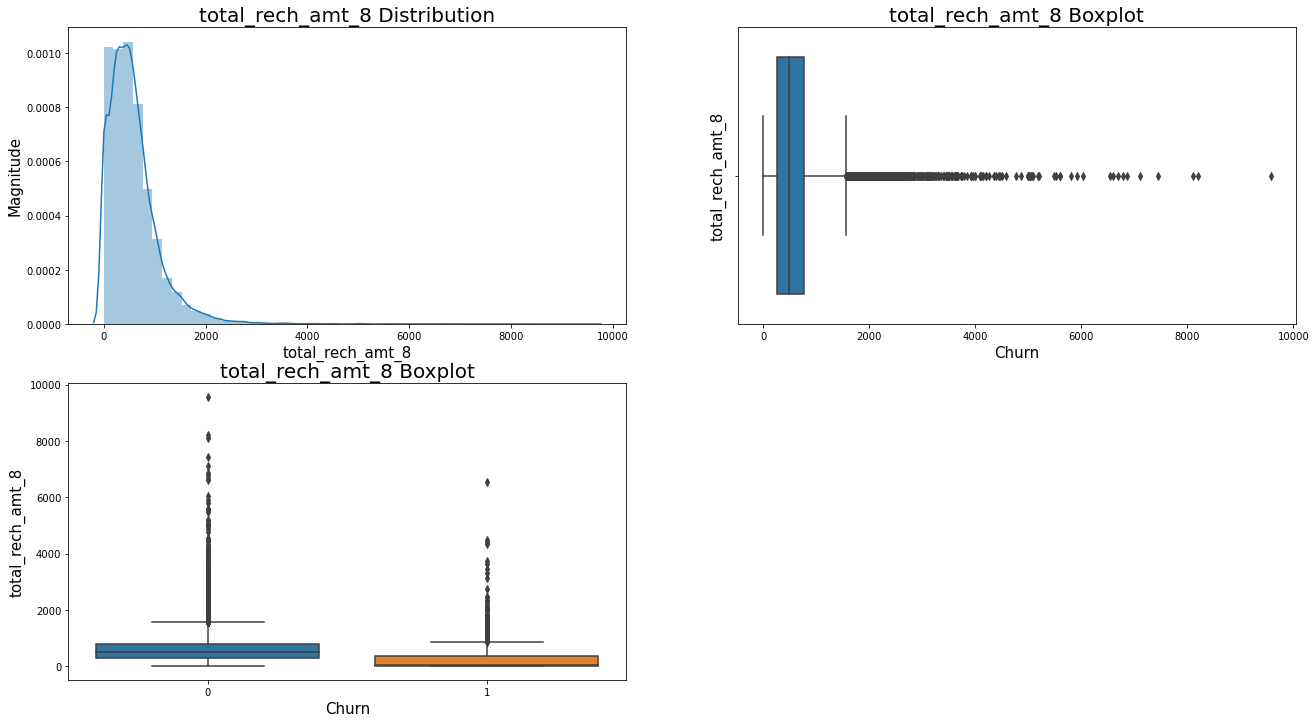

In [70]:
##total_rech_amt_8
## For now dummy dataset is considered. outlier treatment is necessary on this column
distboxplot(df1[df1.total_rech_amt_8<10000],'total_rech_amt_8')

Summary - 
- Clear trend is visible for churned and non churned customers. 
- Overall total recharge amount for churnd customers is less.
- Outlier treatment is necessary for the variable, will be done in following cells.

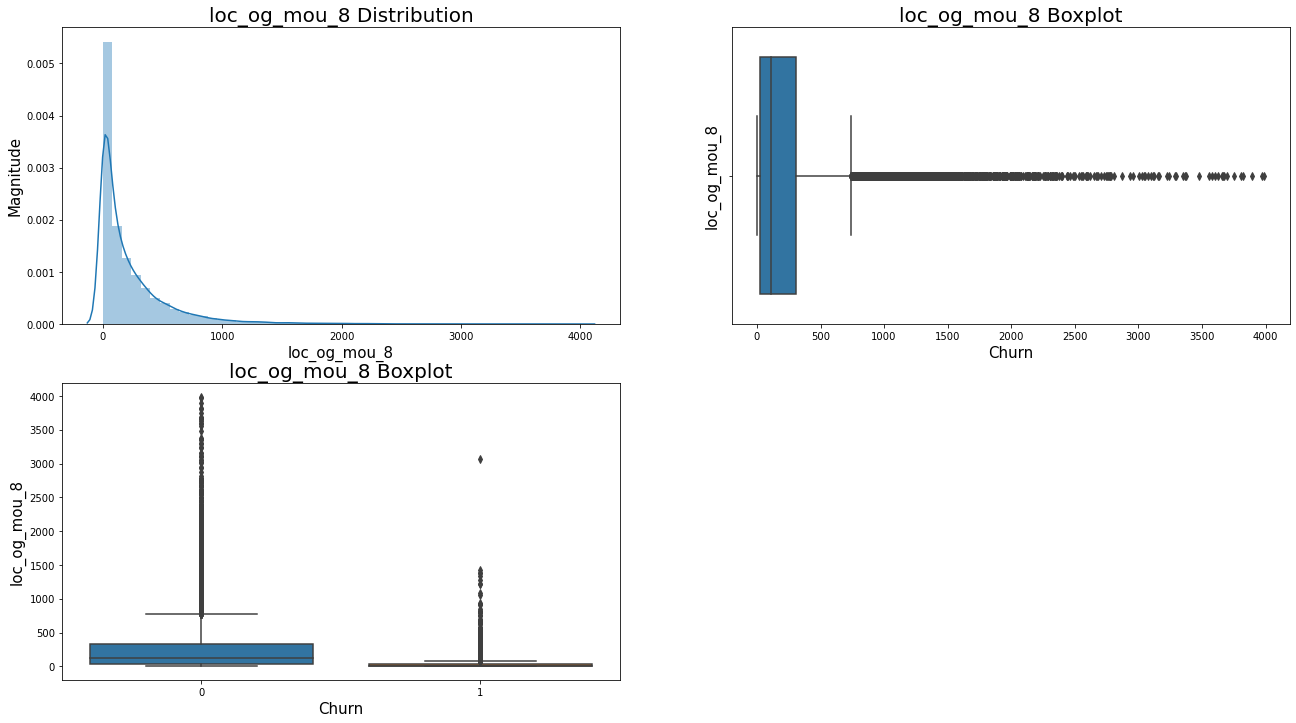

In [71]:
##loc_og_mou_8
## For now dummy dataset is considered. outlier treatment is necessary on this column
distboxplot(df1[df1.loc_og_mou_8<4000],'loc_og_mou_8')

Summary - 
- Clear trend is visible for churned and non churned customers. 
- Overall total outgoing calls for churnd customers is less.
- Outlier treatment is necessary for the variable, will be done in following cells.

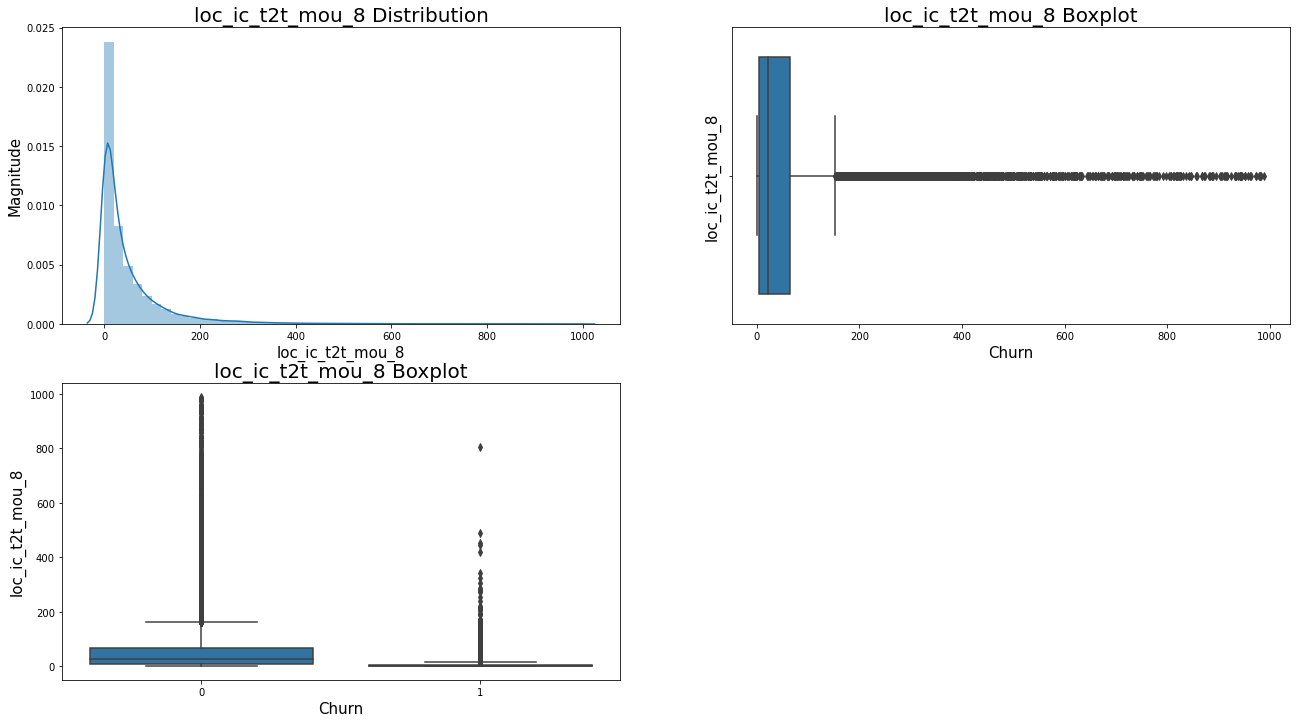

In [72]:
##loc_ic_t2t_mou_8
## For now dummy dataset is considered. outlier treatment is necessary on this column
distboxplot(df1[df1.loc_ic_t2t_mou_8<1000],'loc_ic_t2t_mou_8')

Summary - 
- Clear trend is visible for churned and non churned customers. 
- Overall local incoming calls for churned customers is less.
- Outlier treatment is necessary for the variable, will be done in following cells.

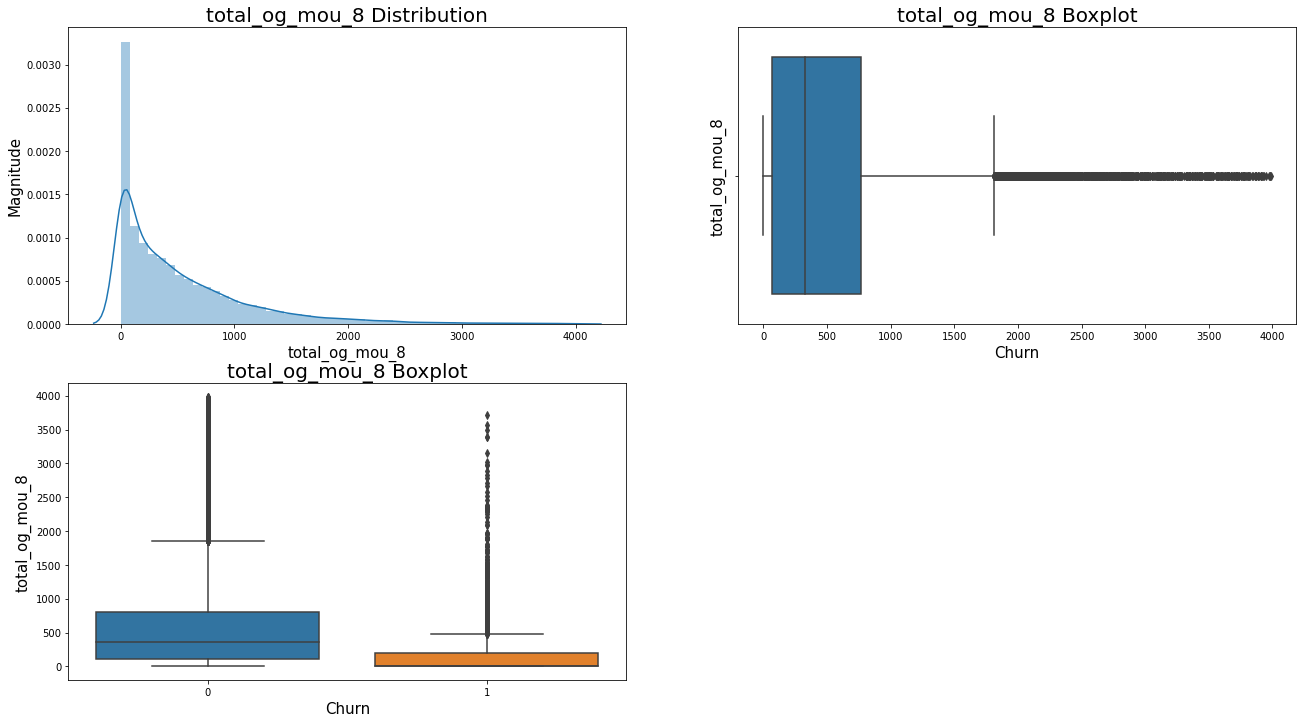

In [73]:
##total_og_mou_8
## For now dummy dataset is considered. outlier treatment is necessary on this column
distboxplot(df1[df1.total_og_mou_8<4000],'total_og_mou_8')

Summary - 
- Clear trend is visible for churned and non churned customers. 
- Overall total outgoing calls for churned customers is less.
- Outlier treatment is necessary for the variable, will be done in following cells.

#### Outlier Removal

In [74]:
## dropping categorical col created
df1 = df1.drop('aon_cat',axis=1)

cols = list(df1.columns)
cols.remove('churn')

In [75]:
df1.shape

(29953, 133)

In [76]:
df1 = df1.astype('float64')

In [77]:
Q1 = df1[cols].quantile(0.05)
Q3 = df1[cols].quantile(0.95)
IQR = Q3 - Q1

df1 = df1[~((df1[cols] < (Q1 - 1.5 * IQR)) |(df1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [78]:
df1.shape

(15839, 133)

<AxesSubplot:xlabel='avg_rech_amt_6and7'>

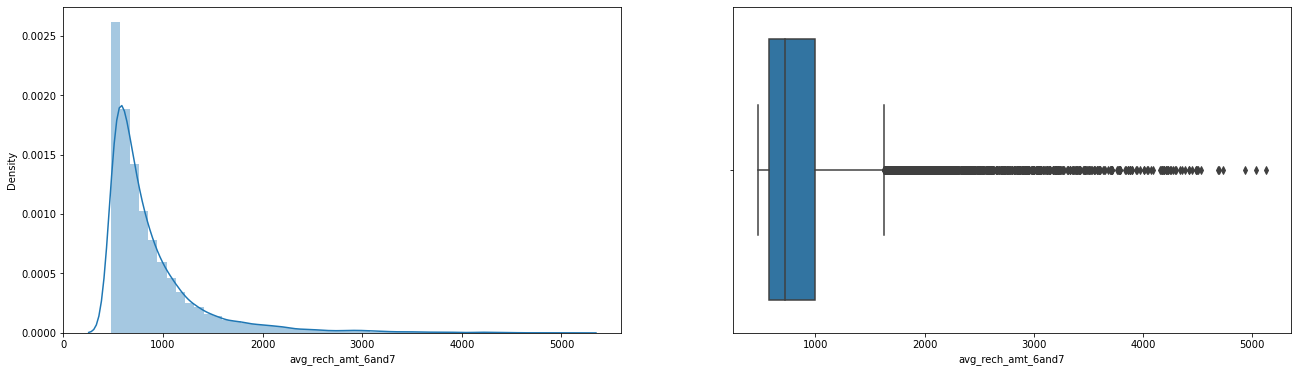

In [79]:
plt.figure(figsize=(22,6))

plt.subplot(1,2,1)
sns.distplot(df1.avg_rech_amt_6and7)

plt.subplot(1,2,2)
sns.boxplot(x='avg_rech_amt_6and7',data=df1)

Text(0.5, 1.0, 'avg_rech_amt_6and7 Boxplot')

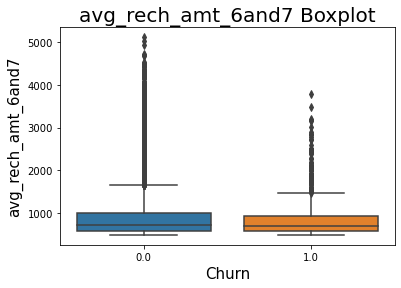

In [80]:
ay=sns.boxplot(x='churn',y='avg_rech_amt_6and7',data=df1)
ay.set_xlabel('Churn',fontsize=15)
ay.set_ylabel('avg_rech_amt_6and7',fontsize=15)
ay.set_title('avg_rech_amt_6and7 Boxplot',fontsize=20)

Summary- avg_rech_amt_6and7
- No significant difference in churn or no churn cases

In [81]:
avg_arpu = (df1.arpu_6 + df1.arpu_7 + df1.arpu_8)/3
data_ = pd.DataFrame(avg_arpu,columns=['avg_arpu'])
avg_arpu.describe([0.1,0.25,0.5,0.75,0.9,0.99])

count    15839.000000
mean       444.106978
std        226.081443
min         40.534000
10%        172.198667
25%        285.695667
50%        423.558000
75%        562.589500
90%        729.473867
99%       1135.916867
max       2531.913667
dtype: float64

In [82]:
data_.columns

Index(['avg_arpu'], dtype='object')

<AxesSubplot:xlabel='avg_arpu'>

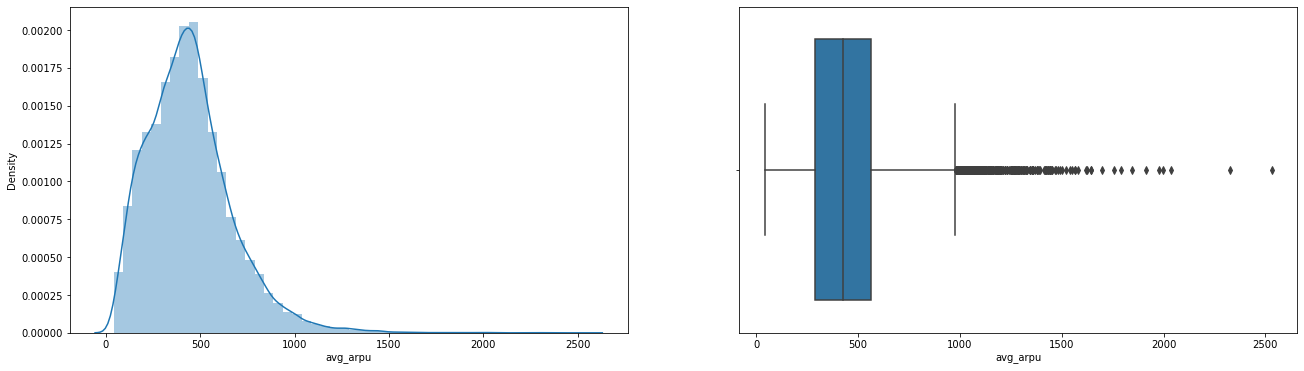

In [83]:
plt.figure(figsize=(22,6))

plt.subplot(1,2,1)
sns.distplot(data_.avg_arpu)

plt.subplot(1,2,2)
sns.boxplot(x='avg_arpu',data=data_)

In [84]:
data_[data_.avg_arpu < 0]

,avg_arpu


Text(0.5, 1.0, 'avg_arpu Boxplot')

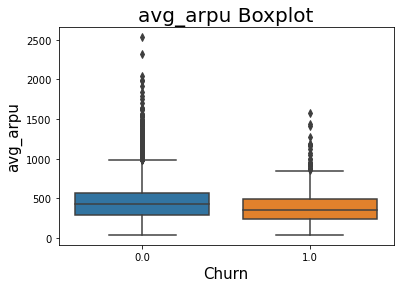

In [85]:
data_['churn'] = df1['churn']
ay=sns.boxplot(x='churn',y='avg_arpu',data=data_)
ay.set_xlabel('Churn',fontsize=15)
ay.set_ylabel('avg_arpu',fontsize=15)
ay.set_title('avg_arpu Boxplot',fontsize=20)

Summary - avg_arpu
- No significant difference in churn no churn cases

In [86]:
data_['avg_loc_og_t2m_mou'] = (df1.loc_og_t2m_mou_6+df1.loc_og_t2m_mou_7+df1.loc_og_t2m_mou_8)/3
data_.avg_loc_og_t2m_mou.describe([0.1,0.25,0.5,0.9,0.99])

count    15839.000000
mean       134.600960
std        170.275889
min          0.000000
10%          3.852667
25%         20.940000
50%         70.170000
90%        359.300667
99%        798.900000
max       1442.683333
Name: avg_loc_og_t2m_mou, dtype: float64

<AxesSubplot:xlabel='avg_loc_og_t2m_mou'>

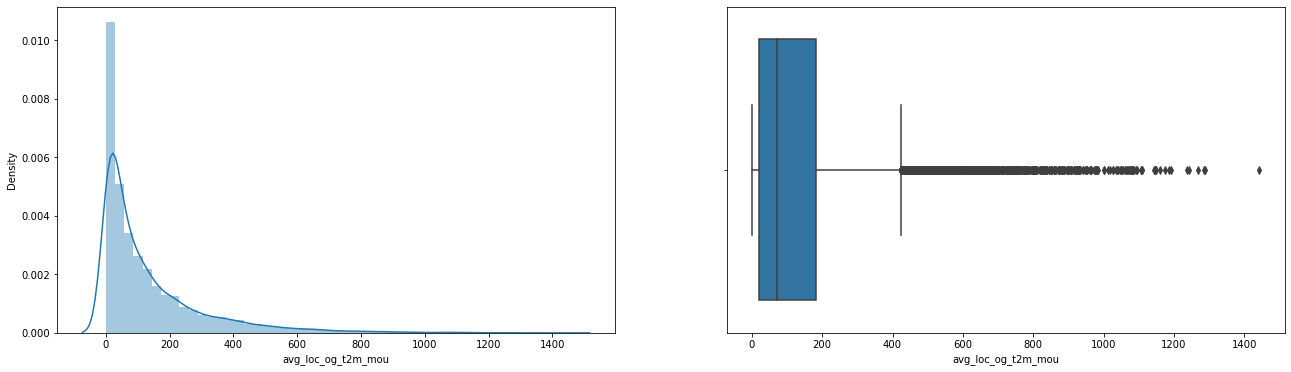

In [87]:
plt.figure(figsize=(22,6))

plt.subplot(1,2,1)
sns.distplot(data_.avg_loc_og_t2m_mou)

plt.subplot(1,2,2)
sns.boxplot(x='avg_loc_og_t2m_mou',data=data_)

In [88]:
##Data lost if we consider till 0.99 percentile

len(df1[data_.avg_loc_og_t2m_mou > 2259.417000])*100/len(df1)

0.0

<AxesSubplot:xlabel='avg_loc_og_t2m_mou'>

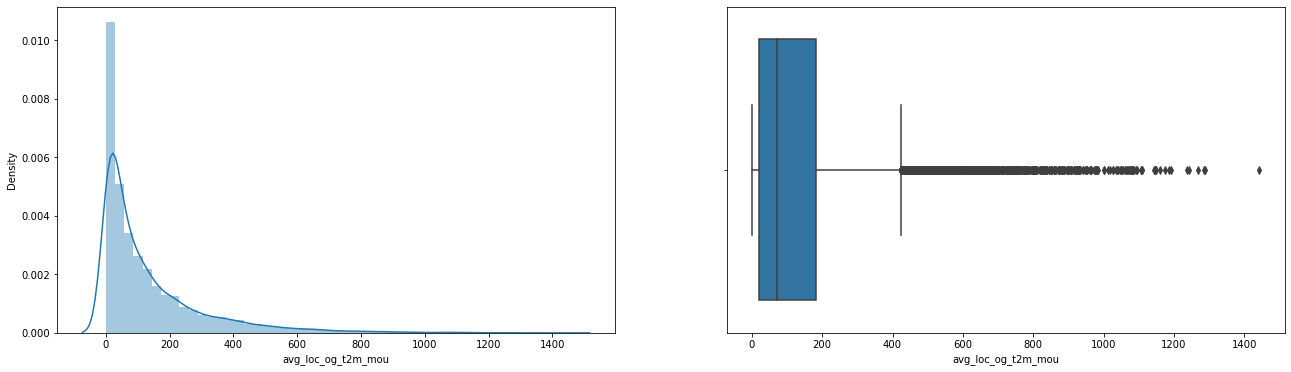

In [89]:
plt.figure(figsize=(22,6))

plt.subplot(1,2,1)
sns.distplot(data_.avg_loc_og_t2m_mou)

plt.subplot(1,2,2)
sns.boxplot(x='avg_loc_og_t2m_mou',data=data_)

<AxesSubplot:xlabel='churn', ylabel='avg_loc_og_t2m_mou'>

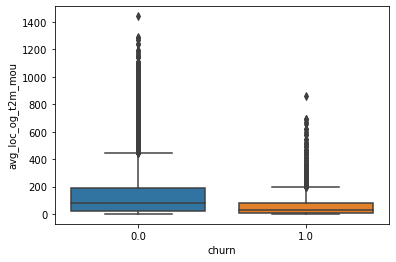

In [90]:
sns.boxplot(x='churn',y='avg_loc_og_t2m_mou', data=data_)

summary - avg_loc_og_t2m_mou
- Avg local outgoing calls t2m(Operator T to other operator mobile) Minutes of usage - voice calls have reduced for churned customers

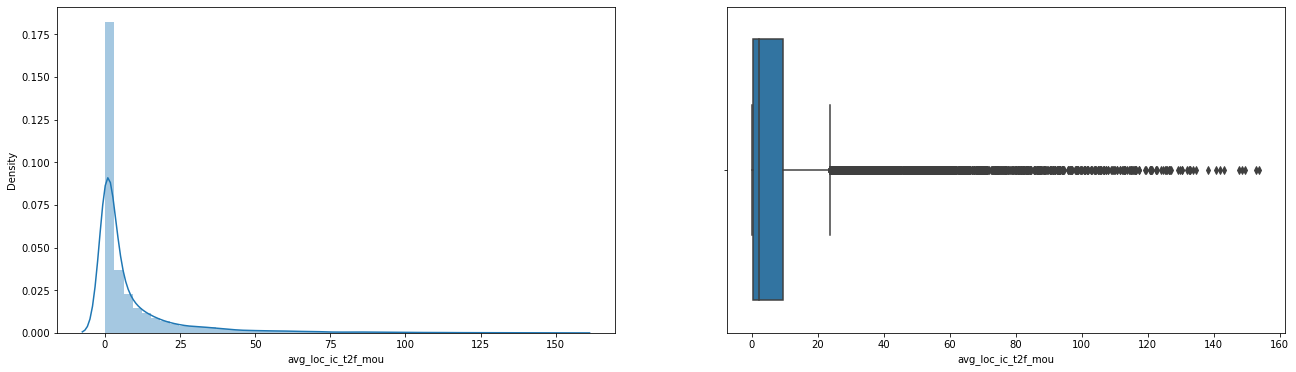

In [91]:
data_['avg_loc_ic_t2f_mou'] = (df1.loc_ic_t2f_mou_6+df1.loc_ic_t2f_mou_7+df1.loc_ic_t2f_mou_8)/3

plt.figure(figsize=(22,6))

plt.subplot(1,2,1)
ax=sns.distplot(data_.avg_loc_ic_t2f_mou)

plt.subplot(1,2,2)
ay=sns.boxplot(x='avg_loc_ic_t2f_mou', data=data_)

Summary - avg_loc_ic_t2f_mou
- Data is highly skewed

<AxesSubplot:>

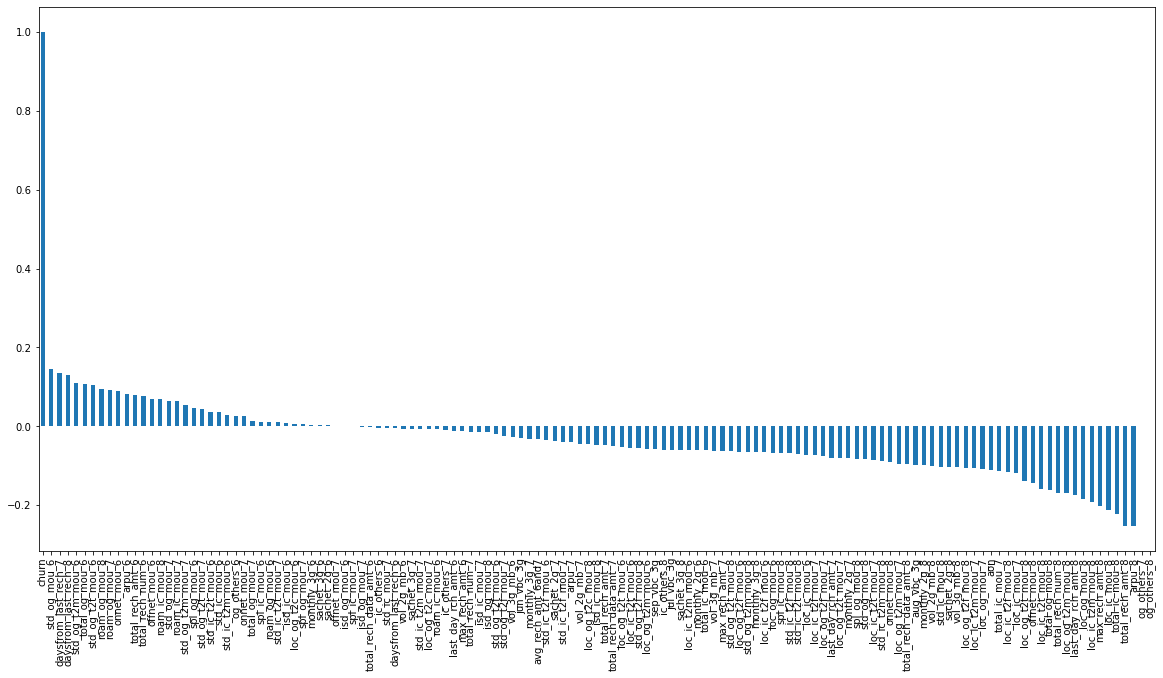

In [92]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
df1.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

## 5. Model building 

### Data Preparation

In [93]:
## X y split
y = df1.pop('churn')
X = df1

In [94]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_rech_amt_6and7,daysfrom_last_rech_6,daysfrom_last_rech_7,daysfrom_last_rech_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.652055,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,9.0,15.0,23.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.863014,21.03,910.65,122.16,0.00,154.0,354.0,207.0,696.0,5.0,0.0,1.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.0,0.0,0.0,81.76,44.21,101.93,207.09,131.89,261.04,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,22.0,26.0,27.0,600.0,680.0,718.0,50.0,50.0,50.0,30.0,20.0,50.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.972603,0.00,0.00,0.00,0.00,154.0,154.0,154.0,640

In [95]:
#feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [96]:
X=pd.DataFrame(X,columns=df1.columns)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_rech_amt_6and7,daysfrom_last_rech_6,daysfrom_last_rech_7,daysfrom_last_rech_8
0,-1.010940,-0.940303,-0.668771,-0.634876,-0.624946,-0.579235,-0.854821,-0.851547,-0.792565,-0.269325,-0.241234,-0.248494,-0.279731,-0.258173,-0.257782,-0.602129,-0.611286,-0.591989,-0.740273,-0.745402,-0.710003,-0.414471,-0.415734,-0.408917,-0.336542,-0.339542,-0.332200,-0.814909,-0.820517,-0.773451,-0.481667,-0.480502,-0.436958,-0.505075,-0.506438,-0.461545,-0.220249,-0.213917,-0.210379,-0.662030,-0.662154,-0.593219,-0.128395,-0.116726,-0.101794,-0.487578,-0.522966,-0.503799,-0.376835,0.0,0.0,-1.000526,-0.996220,-0.897593,-0.695085,-0.712230,-0.682471,-0.836806,-0.847688,-0.782582,-0.474456,-0.472975,-0.405446,-0.932142,-0.944752,-0.867719,-0.440267,-0.434565,-0.418027,-0.512721,-0.517973,-0.487782,-0.285528,-0.282157,-0.281942,-0.607992,-0.609714,-0.573643,-1.016032,-1.033349,-0.941398,-0.395634,-0.197004,-0.24802,-0.22592,-0.232470,-0.228957,-0.277013,-0.266448,-0.273232,-0.894909,-0.998226,-0.907384,-0.595208,-0.907228,-0.622210,1.053700,1.048540,1.148046,1.986714,1.956088,2.033081,-0.334432,-0.449339,-0.386249,-0.316907,-0.204268,-0.247665,-0.406836,-0.411401,-0.386346,-0.471362,-0.491053,-0.456404,1.999765,1.949590,2.148962,-0.299335,-0.28905,-0.252103,-0.234772,-0.318593,-0.431779,-0.043677,0.256237,-0.245341,-0.284386,-0.193349,-0.642816,1.131344,2.422965,3.502566
1,-0.335118,0.121359,-0.938733,0.501572,0.314913,-0.475866,-0.602427,-0.634938,-0.393923,-0.269325,-0.241234,-0.248494,-0.279731,-0.258173,-0.257782,2.585631,1.789834,-0.445858,-0.308796,-0.364700,-0.426806,-0.414471,-0.415734,-0.408917,-0.336542,-0.339542,2.122429,0.737612,0.379314,-0.503305,-0.152688,-0.114590,-0.368082,-0.463999,-0.476149,-0.201834,-0.220249,-0.213917,-0.210379,-0.407885,-0.385494,-0.383535,-0.128395,-0.116726,-0.101794,-0.487578,-0.522966,0.736778,-0.376835,0.0,0.0,-0.062193,-0.207473,-0.564783,-0.339067,-0.560029,-0.680075,-0.455257,-0.753277,-0.706401,-0.474456,-0.472975,-0.466632,-0.515361,-0.820464,-0.813926,-0.440267,-0.398949,-0.411025,0.188323,-0.388559,-0.465916,-0.285528,-0.282157,-0.281942,-0.042583,-0.492219,-0.553316,-0.509

In [97]:
#test train splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=8)

In [98]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

X_train Shape :  (11087, 132)
X_test Shape :  (4752, 132)


In [99]:
X_train = pd.DataFrame(X_train)
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_rech_amt_6and7,daysfrom_last_rech_6,daysfrom_last_rech_7,daysfrom_last_rech_8
9854,-0.763526,0.066444,0.182225,-0.618174,-0.621438,-0.545997,-0.458845,-0.333222,-0.415012,-0.269325,-0.241234,-0.248494,-0.279731,-0.258173,-0.257782,-0.536900,-0.596830,-0.460015,-0.007838,0.207918,-0.211803,-0.414471,-0.354788,-0.330338,-0.336542,-0.339542,-0.332200,-0.225625,-0.077003,-0.341448,-0.481667,-0.480502,-0.436958,-0.475400,-0.464715,-0.325221,0.583184,1.042548,-0.210379,-0.640412,-0.631920,-0.508454,-0.128395,-0.116726,-0.101794,-0.487578,-0.522966,-0.503799,-0.376835,0.0,0.0,-0.715183,-0.641260,-0.624959,-0.416423,-0.642471,-0.644937,-0.499919,-0.265016,-0.545649,-0.205614,-0.051986,-0.466632,-0.549398,-0.426791,-0.678014,-0.440267,-0.434565,-0.418027,0.002357,-0.223618,0.089485,1.433442,4.041200,2.561204,-0.082159,-0.077457,0.080623,-0.549595,-0.434313,-0.641459,-0.395634,-0.197004,-0.24802,-0.22592,-0.232470,-0.228957,-0.277013,-0.266448,-0.273232,-0.771793,-0.126601,-0.531614,-0.230054,-0.310528,-0.104928,0.361928,0.357138,0.452458,0.427791,-0.954140,0.861449,0.240180,0.434481,0.005173,1.449493,1.822273,2.516179,-0.406836,-0.411401,-0.386346,-0.471362,-0.100327,-0.456404,1.999765,1.949590,4.640354,-0.299335,-0.289050,-0.252103,-0.795488,4.595633,3.666398,3.404928,-0.199842,-0.372927,-0.041245,0.612098,-0.266088,-0.549292,1.773990,1.625313
8208,-0.084293,-0.095564,0.015426,1.432811,2.231420,2.554474,-0.629090,-0.626798,-0.653297,-0.001668,-0.241234,-0.248494,1.943621,-0.258173,-0.257782,0.408067,-0.548828,-0.485053,-0.372483,-0.667945,-0.636710,-0.414471,-0.415734,-0.408917,-0.336542,-0.339542,2.894864,-0.144856,-0.737122,-0.678188,1.137520,2.429572,2.779068,-0.460998,-0.297402,-0.389626,-0.220249,-0.213917,-0.210379,0.485956,1.517613,1.700958,-0.128395,-0.116726,-0.101794,-0.487578,-0.522966,1.316441,-0.376835,0.0,0.0,0.386743,1.106002,1.260628,0.880864,-0.614320,-0.653721,-0.199477,-0.825199,-0.744324,0.333604,-0.445766,-0.466632,0.181235,-0.891500,-0.834716,-0.124440,-0.142273,-0.386519,-0.052964,-0.424401,-0.342792,-0.285528,-0.282157,-0.281942,-0.110644,-0.415318,-0.444633,0.141087,-0.944163,-0.87636

### Handling class imbalance

In [100]:

sm = SMOTE(random_state=50)
X_train_sm,y_train_sm = sm.fit_sample(X_train,y_train)

In [101]:
print("X_train_sm Shape", X_train_sm.shape)
print("y_train_sm Shape", y_train_sm.shape)

balance = (y_train_sm != 0).sum()/(y_train_sm == 0).sum()
print("Imbalance in Train Data : ",balance)

X_train_sm Shape (20350, 132)
y_train_sm Shape (20350,)
Imbalance in Train Data :  1.0


### 5.1 PCA

In [102]:
pca = PCA(random_state=8)

In [103]:
pca.fit(X_train_sm)

PCA(random_state=8)

In [104]:
X_train_pca = pca.fit_transform(X_train_sm)
print(X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(20350, 132)
(4752, 132)


In [105]:
pca.components_

array([[ 1.51399162e-01,  2.00233957e-01,  1.77636901e-01, ...,
        -8.19711330e-02, -1.05697594e-01, -4.37995121e-02],
       [-6.97148647e-02, -3.24366658e-02,  6.12775738e-02, ...,
         7.18174083e-02,  2.65078419e-02,  7.66802258e-03],
       [-1.36359454e-01,  9.86640337e-02,  2.14877603e-01, ...,
         1.14802802e-01, -6.88793837e-02, -2.28298499e-02],
       ...,
       [ 3.36330340e-07,  2.35865067e-07,  2.42057031e-07, ...,
        -6.29267337e-08, -1.09577573e-07,  3.22953375e-08],
       [-0.00000000e+00, -6.31441283e-17, -2.54897637e-17, ...,
        -9.32789888e-17, -8.05841576e-18, -4.10271721e-17],
       [ 0.00000000e+00,  6.78202694e-17, -2.00255657e-17, ...,
        -7.75022498e-17,  1.39931110e-17, -1.23334354e-17]])

In [106]:
pca.explained_variance_ratio_

array([1.39518738e-01, 1.08760671e-01, 5.08875307e-02, 4.85059491e-02,
       4.09277443e-02, 3.33045711e-02, 2.88280279e-02, 2.36410207e-02,
       2.01158718e-02, 1.81468926e-02, 1.75863594e-02, 1.62307326e-02,
       1.48647368e-02, 1.45267176e-02, 1.34220680e-02, 1.30619951e-02,
       1.28730385e-02, 1.23441213e-02, 1.16477429e-02, 1.12663503e-02,
       1.05343060e-02, 1.01577012e-02, 1.00746983e-02, 9.47736695e-03,
       9.29191871e-03, 9.11575657e-03, 8.76215907e-03, 8.52212906e-03,
       8.43785244e-03, 8.09709906e-03, 7.82933566e-03, 7.60688874e-03,
       7.44193091e-03, 7.18892696e-03, 7.15625470e-03, 6.98786005e-03,
       6.84344652e-03, 6.70868191e-03, 6.51030545e-03, 6.34411015e-03,
       6.11799199e-03, 5.85393733e-03, 5.83319214e-03, 5.58005751e-03,
       5.51446913e-03, 5.34016462e-03, 5.22112753e-03, 5.13841037e-03,
       4.95727095e-03, 4.80739709e-03, 4.77618477e-03, 4.67998769e-03,
       4.59792993e-03, 4.45405070e-03, 4.26523803e-03, 4.25640887e-03,
      

In [107]:
churn_metrics_collector = []

### 5.2 Logistic Regression

In [108]:
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_train_pca, y_train_sm)

# Predicted probabilities
y_pred = lr_pca.predict(X_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [109]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[3673  687]
 [  80  312]]


<BarContainer object of 132 artists>

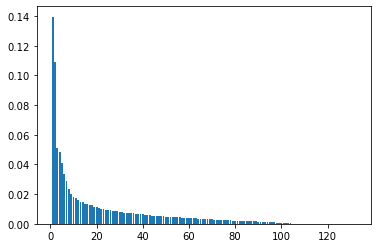

In [110]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [111]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

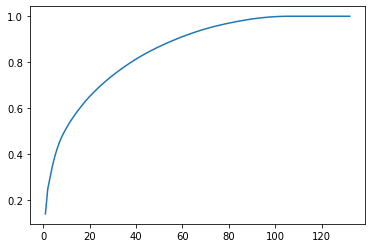

In [112]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [113]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))

Logistic Regression accuracy with PCA:  0.8385942760942761


In [114]:
cs = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [115]:
len(cs)

132

In [116]:
sum([1 if i<99 else 0 for i in cs])

91

In [117]:
pca_32 = PCA(n_components=91)

df_tr_pca_32 = pca_32.fit_transform(X_train_sm)
print(df_tr_pca_32.shape)

df_test_pca_32 = pca_32.transform(X_test)
print(df_test_pca_32.shape)

(20350, 91)
(4752, 91)


In [118]:
# Let's run the model using the selected variables
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_32, y_train_sm)



LogisticRegression(C=1000000000.0)

In [119]:
# Predicted probabilities : TRAIN 
y_pred32 = lr_pca1.predict(df_tr_pca_32)
print(classification_report(y_train_sm,y_pred32))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87     10175
         1.0       0.85      0.90      0.88     10175

    accuracy                           0.87     20350
   macro avg       0.87      0.87      0.87     20350
weighted avg       0.87      0.87      0.87     20350



In [120]:
# Predicted probabilities : TEST
y_pred32 = lr_pca1.predict(df_test_pca_32)
print(classification_report(y_test,y_pred32))

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      4360
         1.0       0.31      0.79      0.45       392

    accuracy                           0.84      4752
   macro avg       0.65      0.82      0.68      4752
weighted avg       0.92      0.84      0.87      4752



In [121]:
current_result = classification_report(y_test,y_pred32)
churn_metrics = ['LR_PCA']+ current_result.split('\n')[3].split()[1:-1] + [current_result.split('\n')[5].split()[1]]
churn_metrics_collector.append(churn_metrics)

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
#fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [124]:
#draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### 5.3 XGBoost

In [125]:
# !pip uninstall xgboost -y
# brew install libomp
# !pip install xgboost

In [126]:
xgclf = xgb.XGBClassifier()
xgclf.fit(X_train_sm, y_train_sm)

[23:05:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_sm,y_score=xgclf.predict_proba(X_train_sm)[:, 1]))
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,y_score=xgclf.predict_proba(X_test)[:, 1]))

AUC on train data by XGBoost = 1.0
AUC on test data by XGBoost = 0.9279752153154842


In [128]:
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.1,0.2,0.3],
              'max_depth': [2,3],
              'min_child_weight': [1],
              'n_estimators': [1]}

scorer = metrics.make_scorer(metrics.accuracy_score,
                             greater_is_better=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

gscv = clf_xgb.fit(X_train_sm, y_train_sm)

[23:05:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [129]:
gscv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 1}

In [130]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1}
0.8703198684720496
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [131]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_sm,
                                                              y_score=xgclf.predict_proba(X_train_sm)[:, 1]))
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(X_test)[:, 1]))

AUC on train data by XGBoost = 1.0
AUC on test data by XGBoost = 0.9279752153154842


In [132]:
y_train_pred = xgclf.predict(X_train_sm)
y_test_pred = xgclf.predict(X_test)

print(accuracy_score(y_train_sm, y_train_pred))
confusion_matrix_train = confusion_matrix(y_train_sm, y_train_pred)
# confusion_matrix_train

1.0


In [133]:
print(classification_report(y_train_sm,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10175
         1.0       1.00      1.00      1.00     10175

    accuracy                           1.00     20350
   macro avg       1.00      1.00      1.00     20350
weighted avg       1.00      1.00      1.00     20350



In [134]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      4360
         1.0       0.61      0.59      0.60       392

    accuracy                           0.93      4752
   macro avg       0.79      0.78      0.78      4752
weighted avg       0.93      0.93      0.93      4752



In [135]:
current_result = classification_report(y_test,y_test_pred)
churn_metrics = ['XGBoost']+ current_result.split('\n')[3].split()[1:-1] + [current_result.split('\n')[5].split()[1]]
churn_metrics_collector.append(churn_metrics)

In [136]:
#From above, it's clear case of overfitting

### 5.4 Tree Algorithm

In [137]:
dt = DecisionTreeClassifier(max_depth=3)

In [138]:
dt.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=3)

In [139]:
#x_tr = pd.DataFrame(x_tr)

In [140]:
# !pip install pydotplus
# !pip install graphviz

In [141]:
X_train_sm.shape

(20350, 132)

In [142]:
y_train_pred = dt.predict(X_train_sm)
y_test_pred = dt.predict(X_test)

In [143]:
print(classification_report(y_train_sm,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     10175
         1.0       0.88      0.86      0.87     10175

    accuracy                           0.87     20350
   macro avg       0.87      0.87      0.87     20350
weighted avg       0.87      0.87      0.87     20350



In [144]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      4360
         1.0       0.37      0.77      0.50       392

    accuracy                           0.87      4752
   macro avg       0.67      0.82      0.71      4752
weighted avg       0.93      0.87      0.89      4752



In [145]:
##hyperparam tune
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20,30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
#%%time
grid_search.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    9.8s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [146]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [147]:
dt_best = grid_search.best_estimator_

In [148]:
y_train_pred = dt.predict(X_train_sm)
y_test_pred = dt.predict(X_test)

In [149]:
print(classification_report(y_train_sm, dt_best.predict(X_train_sm)))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     10175
         1.0       0.97      0.98      0.97     10175

    accuracy                           0.97     20350
   macro avg       0.97      0.97      0.97     20350
weighted avg       0.97      0.97      0.97     20350



In [150]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      4360
         1.0       0.41      0.60      0.49       392

    accuracy                           0.90      4752
   macro avg       0.69      0.76      0.72      4752
weighted avg       0.92      0.90      0.90      4752



In [151]:
current_result = classification_report(y_test, dt_best.predict(X_test))
churn_metrics = ['DT']+ current_result.split('\n')[3].split()[1:-1] + [current_result.split('\n')[5].split()[1]]
churn_metrics_collector.append(churn_metrics)

### 5.5 Random Forest Classifier

In [152]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [153]:
%%time
rf.fit(X_train_sm, y_train_sm)

CPU times: user 219 ms, sys: 5.4 ms, total: 224 ms
Wall time: 223 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [154]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [155]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [156]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [157]:
%%time
grid_search.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.4min finished


CPU times: user 13.1 s, sys: 221 ms, total: 13.3 s
Wall time: 1min 25s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [158]:
grid_search.best_score_

0.9613768573615573

In [159]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [160]:
y_train_pred = rf_best.predict(X_train_sm)
y_test_pred = rf_best.predict(X_test)

In [161]:
print(classification_report(y_test, rf_best.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      4360
         1.0       0.55      0.72      0.62       392

    accuracy                           0.93      4752
   macro avg       0.76      0.83      0.79      4752
weighted avg       0.94      0.93      0.93      4752



In [162]:
current_result = classification_report(y_test, rf_best.predict(X_test))
churn_metrics = ['RF']+ current_result.split('\n')[3].split()[1:-1] + [current_result.split('\n')[5].split()[1]]
churn_metrics_collector.append(churn_metrics)

## 6. Model Selection

In [ ]:
#### Please note that, we are more interested in churn=1 class than the other. Thus, our selection criteria includes f1-score of churn=1 clas

In [163]:
churn_metrics_collector

[['LR_PCA', '0.31', '0.79', '0.45', '0.84'],
 ['XGBoost', '0.61', '0.59', '0.60', '0.93'],
 ['DT', '0.41', '0.60', '0.49', '0.90'],
 ['RF', '0.55', '0.72', '0.62', '0.93']]

In [170]:
results_df = pd.DataFrame(churn_metrics_collector,columns=["model","precision","recall","f1-score","overall_accuracy"])
results_df.sort_values(by='f1-score',ascending=False)

,model,precision,recall,f1-score,overall_accuracy
3,RF,0.55,0.72,0.62,0.93
1,XGBoost,0.61,0.59,0.60,0.93
2,DT,0.41,0.60,0.49,0.90
0,LR_PCA,0.31,0.79,0.45,0.84


#### From above, we can see that RF classifier has best f1-score & recall for 'churn' class is relatively on higher side. So, we will select RF classifier.

## 7. Feature Importance

In [165]:
imp_df = pd.DataFrame({
    "Varname": X_train_sm.columns,
    "Imp": rf_best.feature_importances_*100
})

imp_df = imp_df.sort_values(by="Imp", ascending=False)
imp_df[imp_df.Imp > 1]

,Varname,Imp
80,total_ic_mou_8,7.150277
2,arpu_8,6.131712
14,roam_og_mou_8,5.995752
65,loc_ic_mou_8,5.826048
95,total_rech_amt_8,5.781990
59,loc_ic_t2m_mou_8,4.965719
101,last_day_rch_amt_8,4.849078
11,roam_ic_mou_8,4.627190
131,daysfrom_last_rech_8,3.347879
98,max_rech_amt_8,3.235008


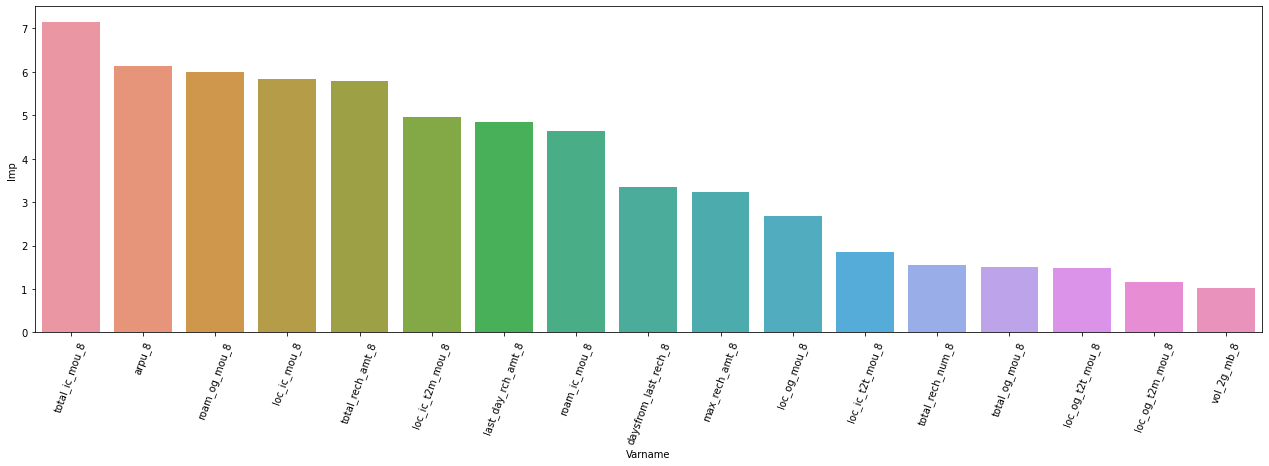

In [166]:
plt.figure(figsize=(22,6))
sns.barplot(x='Varname',y='Imp',data=imp_df[imp_df.Imp > 1])
plt.xticks(rotation=70)
plt.show()

In [167]:
## Important variables are list with decreasing the importance

list(imp_df.Varname)[:10]

['total_ic_mou_8',
 'arpu_8',
 'roam_og_mou_8',
 'loc_ic_mou_8',
 'total_rech_amt_8',
 'loc_ic_t2m_mou_8',
 'last_day_rch_amt_8',
 'roam_ic_mou_8',
 'daysfrom_last_rech_8',
 'max_rech_amt_8']

In [168]:
list(imp_df[imp_df.Imp > 1].Varname)

['total_ic_mou_8',
 'arpu_8',
 'roam_og_mou_8',
 'loc_ic_mou_8',
 'total_rech_amt_8',
 'loc_ic_t2m_mou_8',
 'last_day_rch_amt_8',
 'roam_ic_mou_8',
 'daysfrom_last_rech_8',
 'max_rech_amt_8',
 'loc_og_mou_8',
 'loc_ic_t2t_mou_8',
 'total_rech_num_8',
 'total_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'vol_2g_mb_8']

## 8. Recommendations

Top 17 variables who have importnace greater than 1 are as follows -

**['total_ic_mou_8', 'loc_ic_mou_8', 'roam_og_mou_8', 'roam_ic_mou_8', 'daysfrom_last_rech_8', 'loc_ic_t2m_mou_8', 'arpu_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'max_rech_amt_8', 'total_og_mou_8', 'loc_og_t2m_mou_8', 'total_rech_num_8', 'loc_og_t2t_mou_8', 'total_rech_data_amt_8']**

Based on the above varibales behaviour we should decide the action for churn/ non-churn customer

### In summary, Insights are as follows -
- For churned customers the overall usage (incoming calls, outgoing calls) is reduced.
- Revenue perspective, overall recharge amount is less for churned customers.
- Duration from last recharge is more for churned customers.

### Strategies to Manage Customer Churn
- Priority Based Customer Usage Monitoring
    - Customers who are with an operator for more than 5 years rarely churn. Thus operator should bucketize customers based 'age on network'.
    - Higher priority monitoring should be conducted for a bucket with lower 'age on network'.
    
- Giving Incentives/Offers to Potential Churners
    - Operators can find potential churners by monitoring above important features of customers.Based on reasoning from model inference, operator should give concerned offer.
    - e.g. Churners show higher roaming usage than non-churners. If a customer is likely to churn because of high roaming charges, then operator should give him offers which are benefial for roaming customers.
    
- Improving Outgoing Service
    - The Network operators must futher investigate their outgoing tariffs, plans and campaigns.
    - Might be that the outgoing tariffs offered to it's customer are less competitive to the outgoing tariffs of their competitor.
    - New campaigns which targets the customers with high outgoing usage be rolled out.Like,
        - Discounted outgoing rates during particular hours of the day for these customers.
        - For every X mou, grant customer with some % of X free mou.
        - Investigate and if need be revise the outgoing tarrifs to make it competitive.
        - Free monthly outgoing mou's depending on the users past roaming mou usage.
